# 🧪 Mock Interview: Technical Screen (1 Hour)

## 🎯 Objective
Demonstrate your ability to:
- Load and clean a real-world dataset
- Perform exploratory data analysis
- Engineer relevant features
- Build and evaluate a regression model
- Communicate findings clearly

---

## ⏱️ Time Breakdown

| Task                             | Time |
|----------------------------------|------|
| Data loading and cleanup         | 10 min |
| EDA and visualizations           | 15 min |
| Feature engineering              | 10 min |
| Model training and evaluation    | 15 min |
| Results interpretation           | 10 min |

---

## 📦 Dataset
Use the Titanic dataset from Kaggle. The file should be named: `Titanic-Dataset.csv`.

---

## ✅ 1. Data Loading & Initial Exploration

- Load the dataset into a pandas DataFrame.
- Inspect its shape, column types, and missing values.
- Identify categorical vs numerical variables.

**Questions to address:**
- How many missing values are there in `Age`, `Embarked`, and `Cabin`?
- Which variables do you expect to be most predictive of survival?

---

## 🧹 2. Data Cleaning

- Impute missing values in `Age` using the median.
- Impute missing values in `Embarked` using the mode.
- Drop columns you deem irrelevant for modeling (e.g., `Cabin`, `Ticket`, `PassengerId`).

**Questions to address:**
- Why did you choose median/mode for imputation?
- Which columns are least useful for prediction?

---

## 📊 3. Exploratory Data Analysis (EDA)

- Calculate and compare survival rates by:
  - Gender
  - Passenger class
  - Embarkation point

- Visualize:
  - Distribution of age
  - Bar plot of survival rate by gender
  - Heatmap of missing values

**Questions to address:**
- What does the survival distribution suggest about class or gender bias?
- Are there any surprising patterns?

---

## 🧠 4. Feature Engineering

- Extract the `Title` from the `Name` column.
- Create a new feature `FamilySize = SibSp + Parch + 1`.
- Create a binary feature `IsAlone` (1 if FamilySize == 1, else 0).
- Encode all categorical features for modeling.

**Questions to address:**
- What benefit does `Title` add?
- Did you find `IsAlone` predictive in your analysis?

---

## 🤖 5. Model Training

- Use `LogisticRegression` to predict survival.
- Split the data into training and test sets.
- Fit the model and make predictions.

**Questions to address:**
- What metric(s) did you use to evaluate the model?
- Did the model perform better or worse than expected?

---

## 📈 6. Evaluation

- Print and interpret:
  - Confusion matrix
  - Accuracy, precision, recall, and F1-score
  - Optional: ROC curve

**Questions to address:**
- Which types of errors does your model make most often?
- Would you prioritize precision or recall for this use case?

---

## 📋 7. Summary & Communication

Write 2–3 bullet points summarizing:
- The most important predictors of survival
- What you would do next with more time or data
- Any trade-offs or assumptions you made

---

## 🧪 Bonus HackerRank-Style Prompts (Optional)

1. Write a function that returns all female passengers under age 16 who survived.
2. Write a function to calculate survival rates by title, sorted highest to lowest.
3. Manually calculate model accuracy (without using sklearn).

---


INTERVIEW
-----

## Part 1

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("../data/Titanic-Dataset.csv")

In [4]:
df.shape

(891, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

There are missing values for Age, Cabin, and Embarked are 177, 687, and 2.

From the intial unmodified data, I expect `Pclass` and `Sex` to be the most predictive of survival as the ones who survived were mostly women and children and rich people in First class.

## Part 2

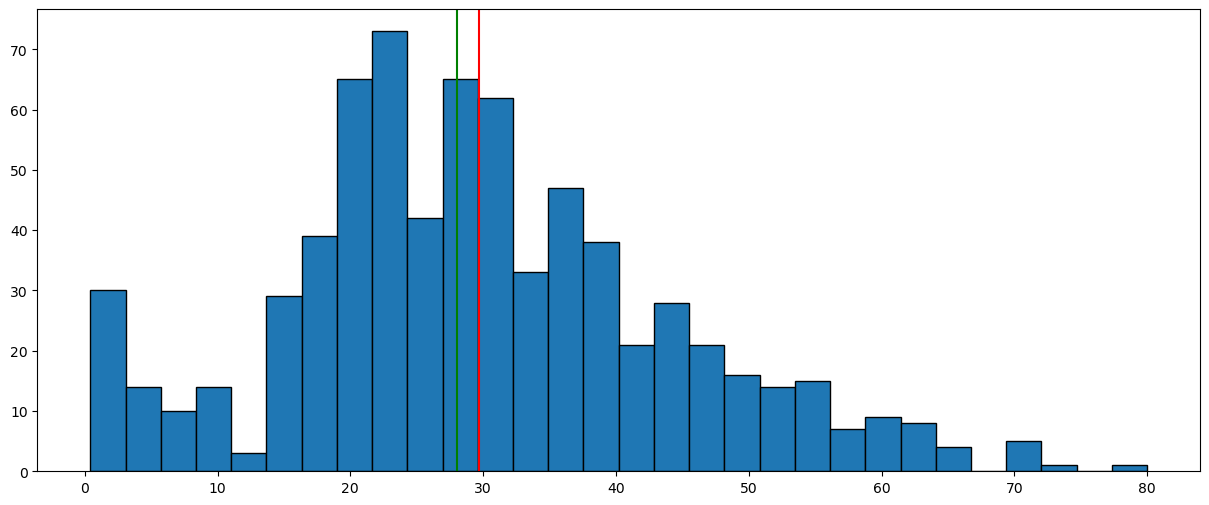

In [7]:
plt.figure(figsize=(15, 6))
plt.hist(df["Age"], bins = 30, edgecolor = "black")
plt.axvline(df["Age"].mean(), color = "red")
plt.axvline(df["Age"].median(), color = "green")
plt.show()

In [8]:
df["Age"].fillna(df["Age"].median(), inplace=True)

In [9]:
df["Age"].isnull().sum()

0

In [10]:
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)

In [11]:
df["Embarked"].isnull().sum()

0

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


I imputed `Age` with the median instead of the mean or mode because the distribution is skewed to higher age values. Higher ages correspond with lesser chances of survival as kids were prioritized to evacuate the Titanic. To preserve the impact of age and not bias the data towards not survived people, I imputed using the median. I imputed `Embarked` with mode as its a categorical variable so mean and median is not possible to use for imputation. The columns that are least useful for prediction seem to be `Name`, `Cabin`, and `Ticket`. These are categorical variables that don't have any underlying pattern relating to Survived.

In [13]:
model_df = df.drop(["Name", "Cabin", "Ticket", "PassengerId"], axis = 1)

## Part 3

In [14]:
sex_survival_rates = df.groupby("Sex")["Survived"].mean()

In [15]:
pclass_survival_rates = df.groupby("Pclass")["Survived"].mean().sort_index()

In [16]:
embarked_survival_rates = df.groupby("Embarked")["Survived"].mean().sort_index()

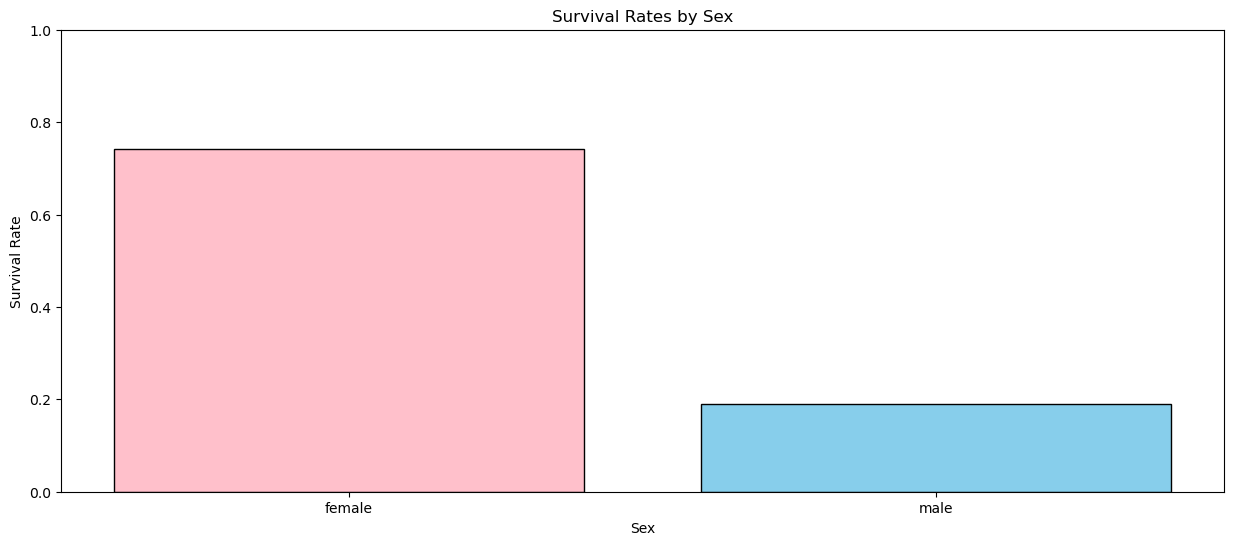

In [17]:
plt.figure(figsize = (15, 6))
plt.bar(sex_survival_rates.index, sex_survival_rates.values, color = ["pink","skyblue"], edgecolor = "black")
plt.ylim(0, 1)
plt.title("Survival Rates by Sex")
plt.xlabel("Sex")
plt.ylabel("Survival Rate")
plt.show()

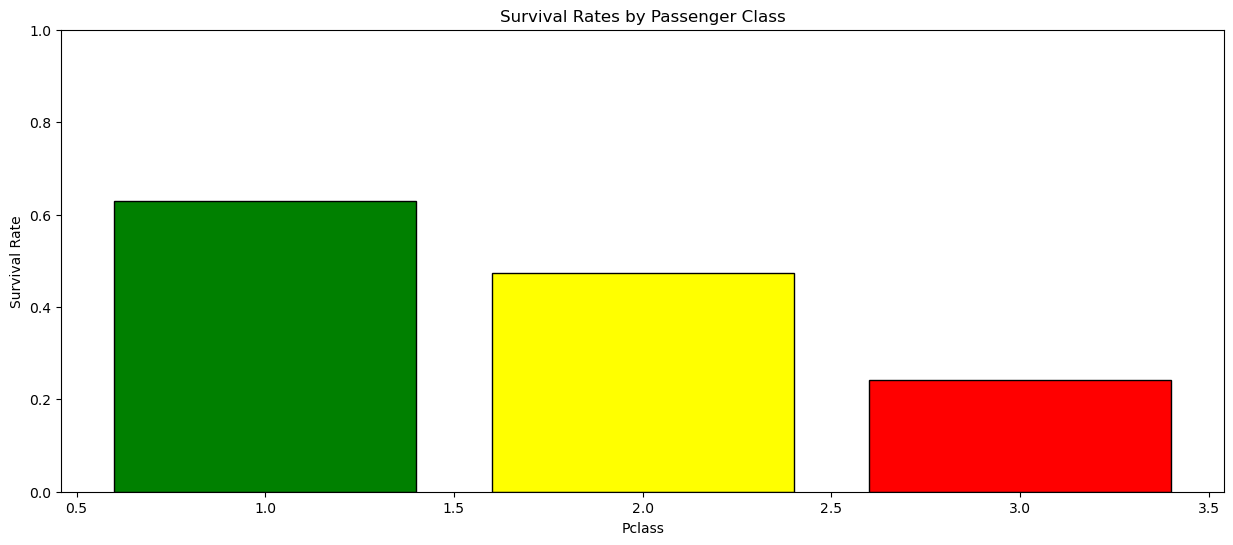

In [18]:
plt.figure(figsize=(15, 6))
plt.bar(pclass_survival_rates.index, pclass_survival_rates.values, color = ["green", "yellow", "red"], edgecolor = "black")
plt.ylim(0, 1)
plt.title("Survival Rates by Passenger Class")
plt.xlabel("Pclass")
plt.ylabel("Survival Rate")
plt.show()

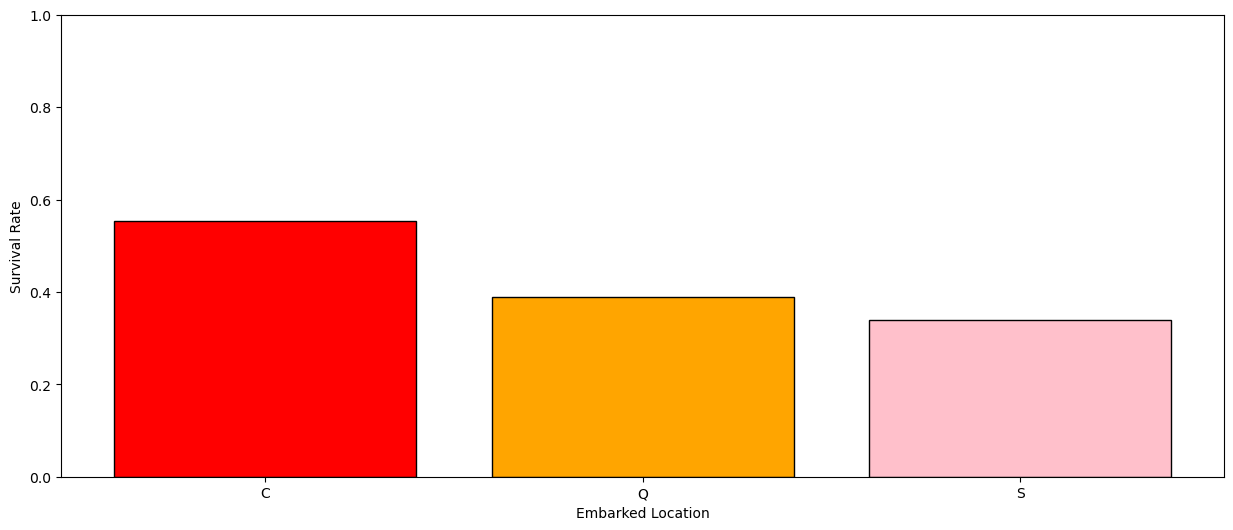

In [19]:
plt.figure(figsize=(15, 6))
plt.bar(embarked_survival_rates.index, embarked_survival_rates.values, color = ["red", "orange", "pink"], edgecolor = "black")
plt.ylim(0, 1)
plt.xlabel("Embarked Location")
plt.ylabel("Survival Rate")
plt.show()

<Axes: >

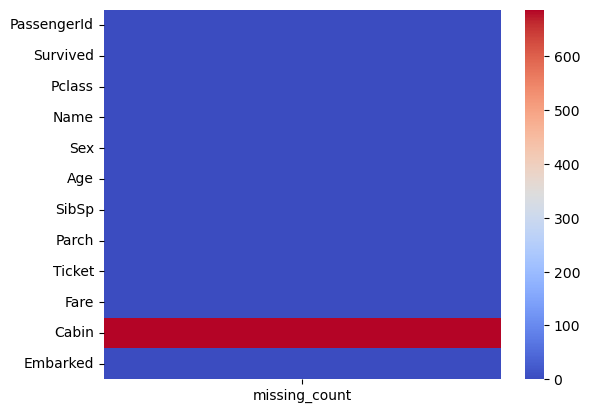

In [20]:
missing_vals = df.isnull().sum().to_frame(name = "missing_count")
sns.heatmap(missing_vals, cmap="coolwarm")

There is a bias towards females, higher passenger classes, and one emabarking location. The `Sex` and `Pclass` bias makes sense as women and kids were the first to be evacuated and specifically upper class passengers because they could pay their way to get on the boat.

## Part 4

In [21]:
df['Title'] = df["Name"].str.extract(r',\s*([^\.]+)\.', expand=False)

In [22]:
df["FamilySize"] = df["SibSp"] + df["Parch"] + 1

In [23]:
df["IsAlone"] = df["FamilySize"].apply(lambda x: 1 if x == 1 else 0)

In [24]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Title', 'FamilySize',
       'IsAlone'],
      dtype='object')

In [26]:
model_df = df.copy()

In [28]:
model_df = df.drop(["Name", "SibSp", "Parch", "Ticket", "Cabin"], axis=1)

In [29]:
model_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked',
       'Title', 'FamilySize', 'IsAlone'],
      dtype='object')

In [34]:
from sklearn.preprocessing._encoders import OneHotEncoder
from sklearn.compose import ColumnTransformer

column_transformer = ColumnTransformer(
    transformers=[
        ("onehot", OneHotEncoder(), ["Sex", "Title", "Embarked", "Pclass"])
    ],
    remainder="passthrough"
)

transformed_data = column_transformer.fit_transform(model_df)

ohe_feature_names = column_transformer.named_transformers_["onehot"].get_feature_names_out(["Sex", "Title", "Embarked", "Pclass"])
all_feature_names = list(ohe_feature_names) + ["PassengerId", "Survived", "Age", "Fare", "FamilySize", "IsAlone"]

model_df = pd.DataFrame(transformed_data, columns = all_feature_names)

In [36]:
model_df.head()

,Sex_female,Sex_male,Title_Capt,Title_Col,Title_Don,Title_Dr,Title_Jonkheer,Title_Lady,Title_Major,Title_Master,...,Embarked_S,Pclass_1,Pclass_2,Pclass_3,PassengerId,Survived,Age,Fare,FamilySize,IsAlone
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,22.0,7.2500,2.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,2.0,1.0,38.0,71.2833,2.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,3.0,1.0,26.0,7.9250,1.0,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,4.0,1.0,35.0,53.1000,2.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,5.0,0.0,35.0,8.0500,1.0,1.0


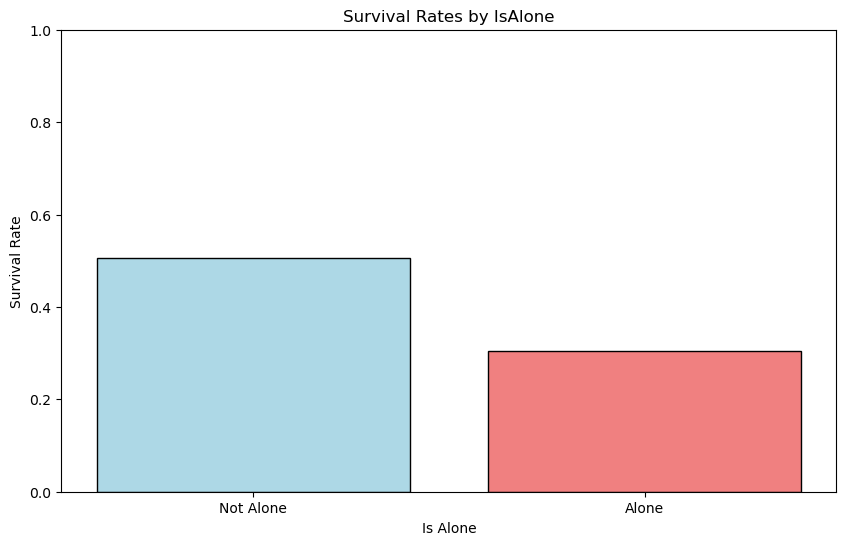

In [38]:
alone_survival_rates = model_df.groupby("IsAlone")["Survived"].mean()

plt.figure(figsize=(10, 6))
plt.bar(alone_survival_rates.index, alone_survival_rates.values, color = ["lightblue", "lightcoral"], edgecolor = "black")
plt.ylim(0, 1)
plt.title("Survival Rates by IsAlone")
plt.xlabel("Is Alone")
plt.ylabel("Survival Rate")
plt.xticks([0, 1], ["Not Alone", "Alone"])
plt.show()

The benefit that `Title` adds is assessing patterns of people in high positions to survival rates. `IsAlone` adds another layer in teh predictive analysis where there is a distint pattern in where being alone corresponds with a lower survival rate. 

## Part 5

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [41]:
model_df.drop("PassengerId", axis=1, inplace=True)

In [43]:
target = "Survived"
features = model_df.drop(target, axis=1).columns

In [44]:
X = model_df[features]
y = model_df[target]

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [46]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [47]:
y_pred = model.predict(X_test)

In [49]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.83


In [50]:
classification_report = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_report)

Classification Report:
               precision    recall  f1-score   support

         0.0       0.85      0.88      0.87       110
         1.0       0.80      0.75      0.78        69

    accuracy                           0.83       179
   macro avg       0.83      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



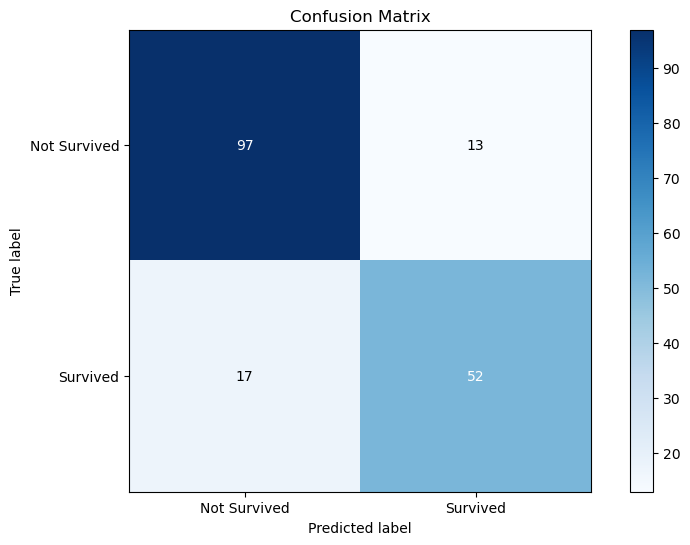

In [51]:
# Assuming y_test and y_pred already exist
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Not Survived', 'Survived'])
plt.yticks(tick_marks, ['Not Survived', 'Survived'])

# Add labels
plt.ylabel('True label')
plt.xlabel('Predicted label')

# Add the text annotations
thresh = conf_matrix.max() / 2  # threshold for text color
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, format(conf_matrix[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if conf_matrix[i, j] > thresh else "black")

plt.show()